     Age  Gender  BP  Cholesterol  Na_to_K
0     23       0   0            0   25.355
1     47       1   1            0   13.093
2     47       1   1            0   10.114
3     28       0   2            0    7.798
4     61       0   1            0   18.043
..   ...     ...  ..          ...      ...
195   56       0   1            0   11.567
196   16       1   1            0   12.006
197   52       1   2            0    9.894
198   23       1   2            1   14.020
199   40       0   1            1   11.349

[200 rows x 5 columns] [4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]
Decision Tree Using DecisionTreeClassifier:


[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.969\nsamples = 200\nvalue = [23, 16, 16, 54, 91]\nclass = 4'),
 Text(0.5, 0.7, 'BP <= 0.5\nentropy = 1.788\nsamples = 109\nvalue = [23, 16, 16, 54, 0]\nclass = 3'),
 Text(0.25, 0.5, 'Age <= 50.5\nentropy = 0.977\nsamples = 39\nvalue = [23, 16, 0, 0, 0]\nclass = 0'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 23\nvalue = [23, 0, 0, 0, 0]\nclass = 0'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16, 0, 0, 0]\nclass = 1'),
 Text(0.75, 0.5, 'BP <= 1.5\nentropy = 0.776\nsamples = 70\nvalue = [0, 0, 16, 54, 0]\nclass = 3'),
 Text(0.625, 0.3, 'Cholesterol <= 0.5\nentropy = 0.998\nsamples = 34\nvalue = [0, 0, 16, 18, 0]\nclass = 3'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 16, 0, 0]\nclass = 2'),
 Text(0.75, 0.1, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 0, 18, 0]\nclass = 3'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 36\nvalue = [0, 0, 0, 36, 0]\nclass = 3'),
 Text(0.75, 0.7, 'entropy = 0.0\nsamples 

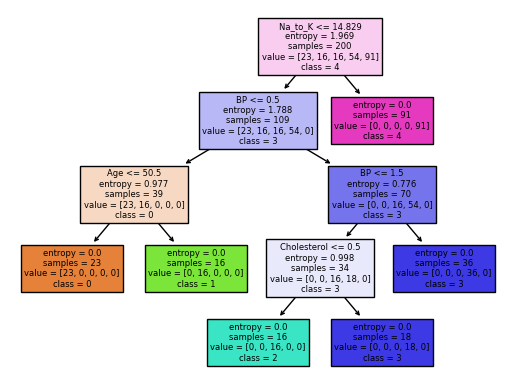

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


dataset = pd.read_csv('drug.csv')


target = 'Drug'
X = dataset.drop(columns=[target])  
y = dataset[target]  


label_encoder = LabelEncoder()


for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])


if y.dtype == 'object':
    y = label_encoder.fit_transform(y)
print(X,y)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)


print("Decision Tree Using DecisionTreeClassifier:")


tree.plot_tree(clf, feature_names=list(X.columns), class_names=[str(c) for c in clf.classes_], filled=True)

In [6]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv(r'Z:\Sem6\ML\lab5\drug.csv')

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Encode only categorical columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Split dataset
X = df.drop('Drug', axis=1)
y = df['Drug']

# Train Naive Bayes model
model = GaussianNB()
model.fit(X, y)

# Get user input
while True:
    age = input("Enter age: ")
    gender = input("Enter gender (F/M): ")
    BP = input("Enter BP (HIGH/NORMAL/LOW): ")
    chol = input("Enter Cholesterol (HIGH/NORMAL): ")
    na_to_k = input("Enter sodium to potassium rate (in decimal): ")

    # Create input DataFrame
    input_data = pd.DataFrame([[age, gender, BP, chol, na_to_k]], 
                              columns=['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K'])

    # Convert numeric values
    input_data['Age'] = pd.to_numeric(input_data['Age'])
    input_data['Na_to_K'] = pd.to_numeric(input_data['Na_to_K'])

    # Encode categorical values
    for column in input_data.columns:
        if column in label_encoders:
            try:
                input_data[column] = label_encoders[column].transform(input_data[column])
            except ValueError:
                print(f"Error: Unrecognized value for {column}. Please enter valid data.")
                continue

    # Ensure correct order of features
    input_data = input_data[X.columns]

    # Predict drug type
    prediction = model.predict(input_data)

    # Convert prediction back to original labels
    predicted_class = label_encoders['Drug'].inverse_transform(prediction)

    print(f'Predicted class: {predicted_class[0]}')


Enter age: 45
Enter gender (F/M): F
Enter BP (HIGH/NORMAL/LOW): LOW
Enter Cholesterol (HIGH/NORMAL): NORMAL
Enter sodium to potassium rate (in decimal): 47.2
Predicted class: drugY
Enter age: 47
Enter gender (F/M): M
Enter BP (HIGH/NORMAL/LOW): LOW
Enter Cholesterol (HIGH/NORMAL): HIGH
Enter sodium to potassium rate (in decimal): 10.114
Predicted class: drugC


KeyboardInterrupt: Interrupted by user